In [229]:
'''
algorithm:

1. randomly initialise k clusters
2. for each datapoint in the dataset, compare the euclidean distance against all clusters
3. assign that datapoint to the closest cluster

1. update cluster locations

'''

import numpy as np
from dataclasses import dataclass


"""
implements the euclidean distance.
"""
def k_dist(X: np.ndarray, Y: np.ndarray):
    return np.linalg.norm(X-Y)

@dataclass
class Centroid:
    location: np.ndarray
    vectors: np.ndarray # dimension (<n, p)

class KMeans:
    def __init__(self, k: int, X: np.ndarray) -> None:
        self.k = k
        self.centroids = [Centroid(
            location = sum(X[i] for i in range(X.shape[0]))/(j+1),
            vectors = []
        ) for j in range(k)]
        self.X = X

    """
    assign vectors to each centroid and then recompute the centroid location. occurs n iter times
    """
    def fit(self, iters: int, viz: bool = False) -> None:
        for i in range(iters):

            # reset centroids for every iteration
            self.centroids = [Centroid(
                location = sum(self.X[i] for i in range(self.X.shape[0]))/(j+1),
                vectors = []
            ) for j in range(k)]
            
            for X_i in self.X:
                distances = []
                for C in self.centroids:
                    distances.append(k_dist(X_i, C.location))
                # add the vector to the closest centroid:
                self.centroids[np.argmin(distances)].vectors.append(X_i)

            for C in self.centroids:
                if len(C.vectors) > 0:
                    C.location = sum(C.vectors) / len(C.vectors)
        
    """
    compares the given datapoint against all centroids and returns the class label of that centroid.
    """
    def predict(self, X_i: np.ndarray) -> np.ndarray:
        return self.centroids[np.argmin(
            [k_dist(X_i, C.location) for C in self.centroids]
        )].location

from sklearn.datasets import make_blobs
X_train, y = make_blobs(n_samples=20, random_state=123, cluster_std=0.6, centers=[[1,1],[3,3]])
kmeans = KMeans(k=20, X=X_train)
kmeans.fit(5)
kmeans.predict([1.2,1.2])

array([0.92203867, 0.93767056])

In [231]:
len(kmeans.centroids)

20

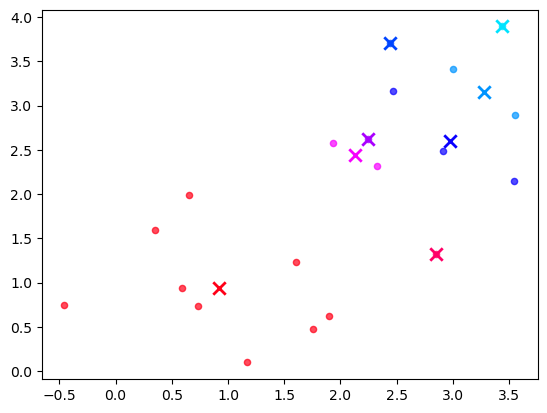

In [233]:
import matplotlib.pyplot as plt
import matplotlib
# colour for each centroid
k = len(kmeans.centroids)      
from matplotlib import colormaps
cmap = colormaps['hsv'].resampled(k)
cluster_colours = cmap(range(k))  

for i, C in enumerate(kmeans.centroids):

    # nothing was assigned to this centroid → skip it
    if not C.vectors:          # empty list == False
        continue
    # turn [[x, y], [x, y], …] into an (N, 2) float array
    vecs = np.stack(C.vectors, axis=0)   # safe because we know it’s non-empty
    xs, ys = vecs[:, 0], vecs[:, 1]

    # draw the points that belong to this centroid
    plt.scatter(xs, ys,
                color=cluster_colours[i],
                s=20, alpha=0.7,               # tweak size / transparency at will
                label=f"cluster {i}")

    # (optional) also plot the centroid itself
    plt.scatter(*C.location,            # or whatever attribute stores the mean
                marker='x', s=80, linewidths=2,
                color=cluster_colours[i])
plt.show()